In [17]:
import os,glob
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyreadr # to read .rds files

In [18]:
ds_co2 = xr.open_dataset('/Users/ud4/models/OLMT/data/atm/datm7/CO2/fco2_datm_1765-2007_US-DUK_control.nc')

In [19]:
ds_co2

<xarray.Dataset>
Dimensions:  (lon: 1, lat: 1, nv: 4, Time: 88695)
Coordinates:
  * lon      (lon) float64 1.0
  * lat      (lat) float64 1.0
  * nv       (nv) int32 1 2 3 4
  * Time     (Time) object 1765-01-02 00:00:00 ... 2008-01-01 00:00:00
Data variables:
    lonc     (lat, lon) float64 ...
    latc     (lat, lon) float64 ...
    lonv     (nv, lat, lon) float64 ...
    latv     (nv, lat, lon) float64 ...
    mask     (lat, lon) float64 ...
    frac     (lat, lon) float64 ...
    area     (lat, lon) float64 ...
    CO2      (Time, lat, lon) float32 ...
    time     (Time) object ...

In [20]:
ds_eco2 = xr.open_dataset('/Users/ud4/models/OLMT/data/atm/datm7/CO2/fco2_datm_1765-2007_US-DUK.nc')

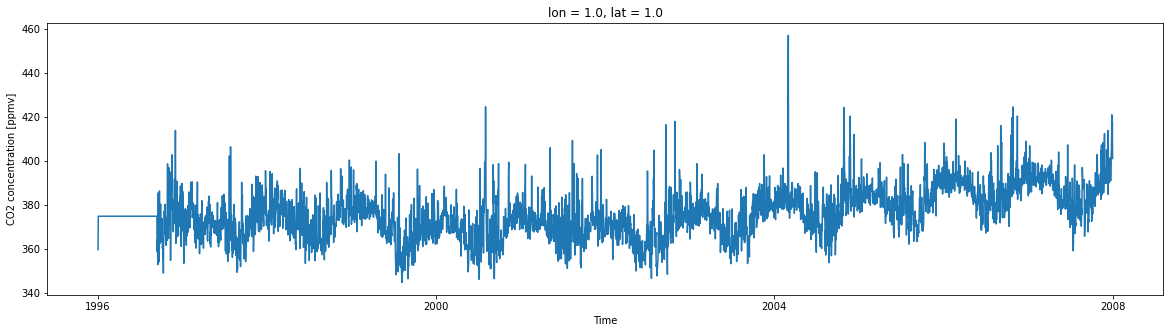

In [21]:
ds_co2.sel(Time=slice('1996-01-01','2009-12-30')).CO2.plot(figsize=(20,5))

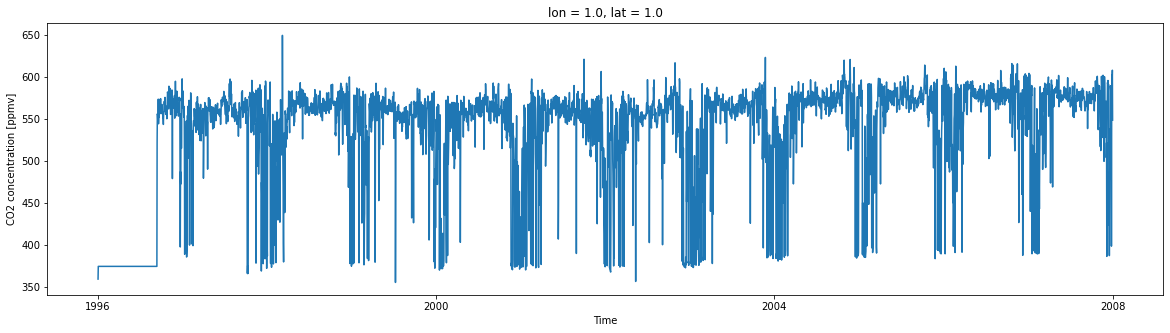

In [22]:
ds_eco2.sel(Time=slice('1996-01-01','2009-12-30')).CO2.plot(figsize=(20,5))

path_in = "/Users/ud4/models/Outputs/"


In [24]:
path_in = "/Users/ud4/models/Outputs/"
fnames={}
case_prefix = "Bharat_AW_Nalloc_mf0df100_r1004_testMetData_US-DUK_I20TRELMFATES"
fnames["DUK_Conly_Trans"] = sorted(glob.glob(f"{path_in}{case_prefix}/run/{case_prefix}.elm.h0.*nc"))[-20:]
#fnames["DUK_Conly_Trans"] = f"{path_in}{case_prefix}/run/{case_prefix}.elm.h0.*nc"
case_prefix = "Bharat_AW_Nalloc_mf0df100_r1004_testMetData_US-DUK_I20TRELMFATES_aCO2"
fnames["DUK_Conly_Trans_aCO2"] = f"{path_in}{case_prefix}/run/{case_prefix}.elm.h0.*nc"
case_prefix = "Bharat_AW_Nalloc_mf0df100_r1004_testMetData_US-DUK_I20TRELMFATES_eCO2"
fnames["DUK_Conly_Trans_eCO2"] = f"{path_in}{case_prefix}/run/{case_prefix}.elm.h0.*nc"

In [25]:
ds = {}
for key in fnames.keys():
    ds[key] = xr.open_mfdataset(fnames[key],decode_times=True)

In [26]:
for idx, key in enumerate(ds.keys()):
    ds[key]['time'] =  pd.to_datetime(ds[key].time.values.astype(str))

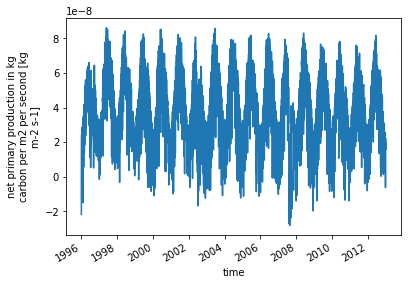

In [27]:
ds[key].FATES_NPP.plot()

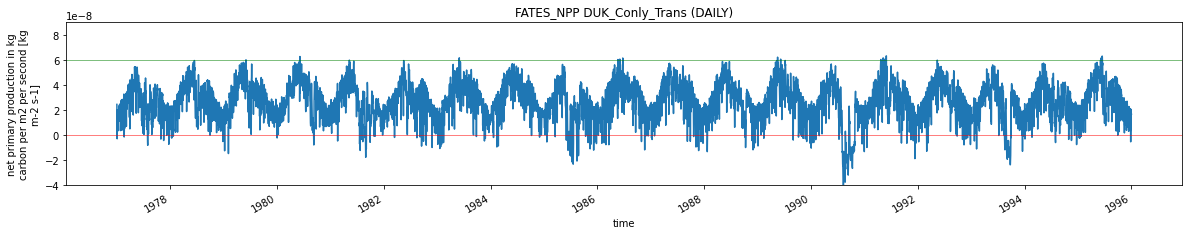

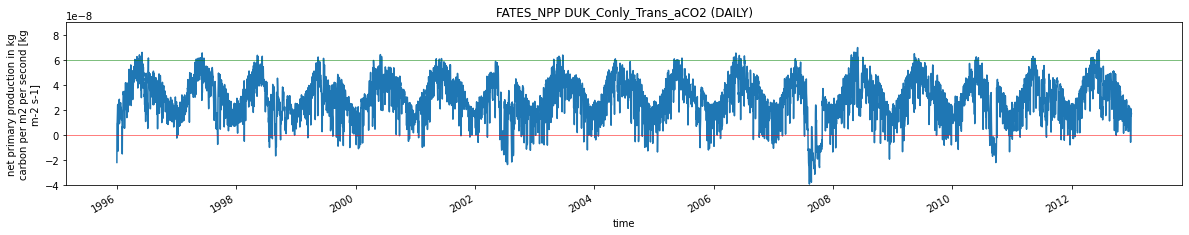

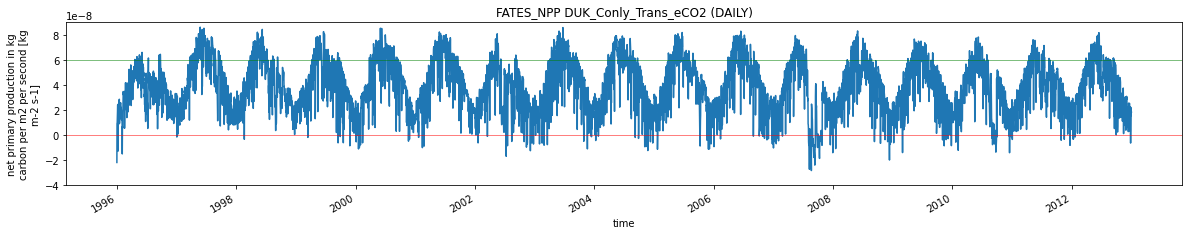

In [28]:
start = "1996-12-01"
end = "2000-01-01"
var = "FATES_NPP"

for idx, key in enumerate(ds.keys()):
    ds[key][var].plot(figsize=(20,3))
    plt.title(f"{var} {key} (DAILY)")
    plt.ylim(-4e-8, 9e-8)
    plt.axhline(y = 0, color = 'r',lw=1, alpha=.5)
    plt.axhline(y = 6e-8, color = 'g',lw=1, alpha=.5)
    #plt.axvspan(start,end,alpha = .2, color = 'red')

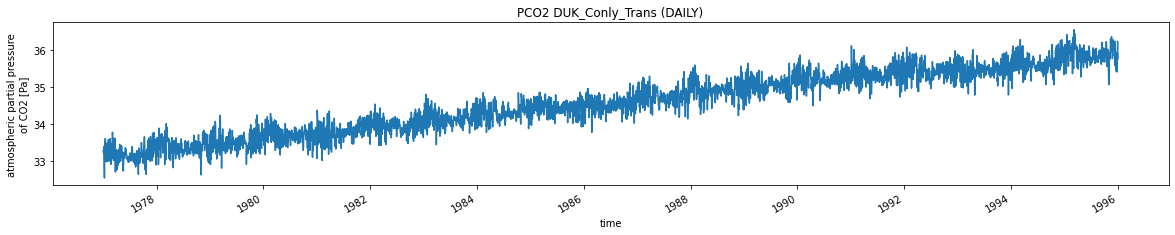

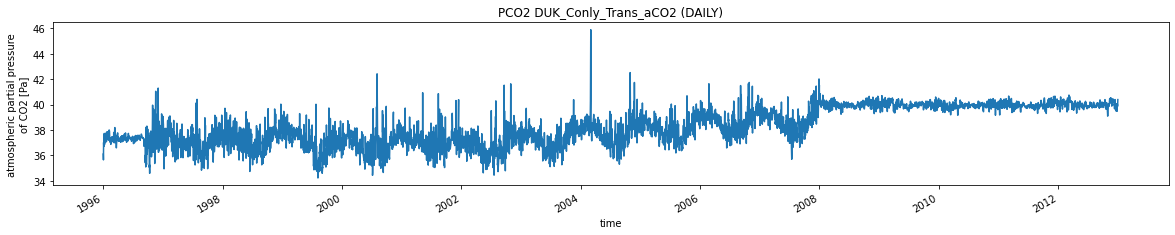

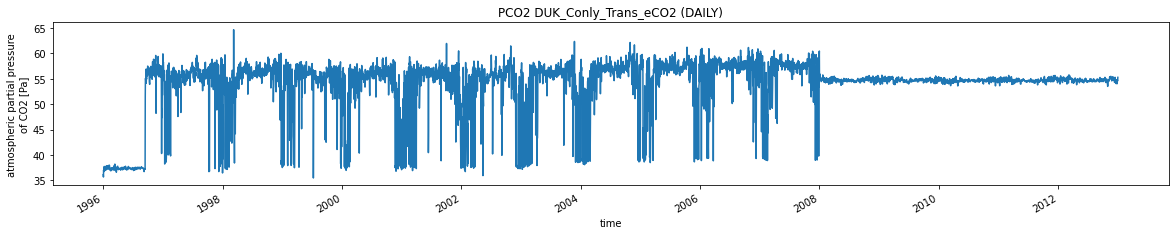

In [31]:
start = "1996-12-01"
end = "2000-01-01"
var = "PCO2"

for idx, key in enumerate(ds.keys()):
    ds[key][var].plot(figsize=(20,3))
    plt.title(f"{var} {key} (DAILY)")
    #plt.ylim(-4e-8, 9e-8)
    #plt.axhline(y = 0, color = 'r',lw=1, alpha=.5)
    #plt.axhline(y = 6e-8, color = 'g',lw=1, alpha=.5)
    #plt.axvspan(start,end,alpha = .2, color = 'red')

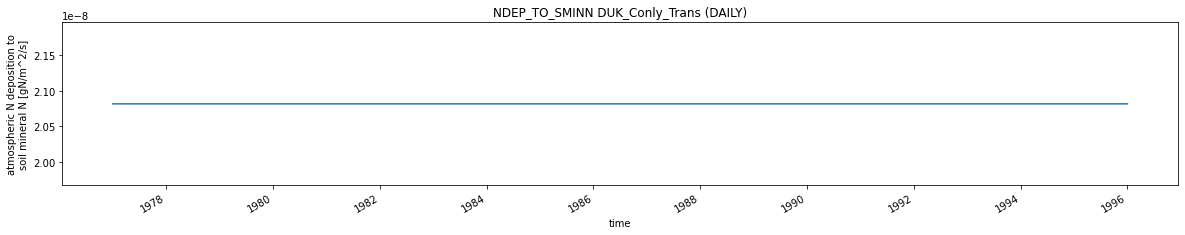

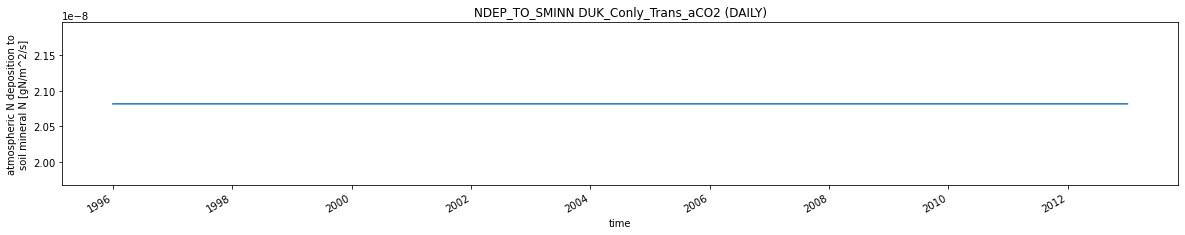

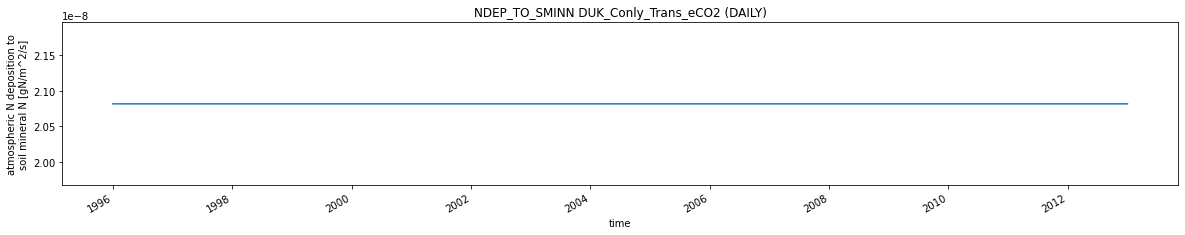

In [32]:
start = "1996-12-01"
end = "2000-01-01"
var = "NDEP_TO_SMINN"

for idx, key in enumerate(ds.keys()):
    ds[key][var].plot(figsize=(20,3))
    plt.title(f"{var} {key} (DAILY)")
    #plt.ylim(-4e-8, 9e-8)
    #plt.axhline(y = 0, color = 'r',lw=1, alpha=.5)
    #plt.axhline(y = 6e-8, color = 'g',lw=1, alpha=.5)
    #plt.axvspan(start,end,alpha = .2, color = 'red')

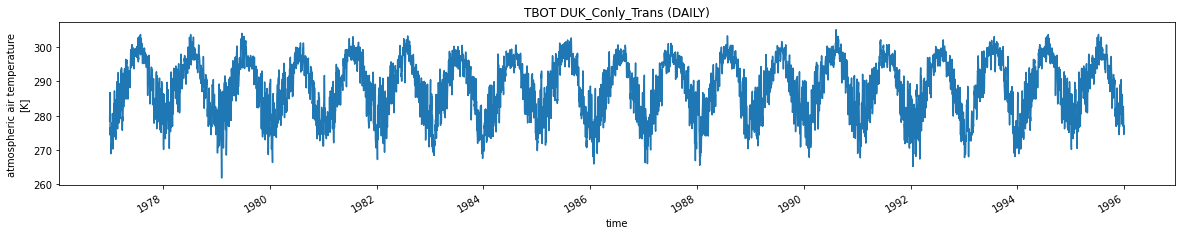

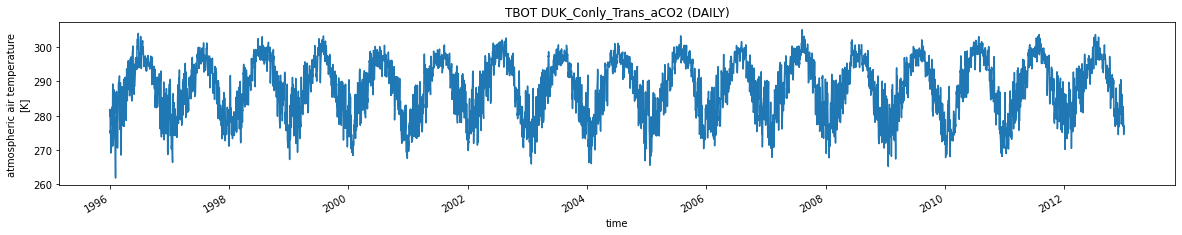

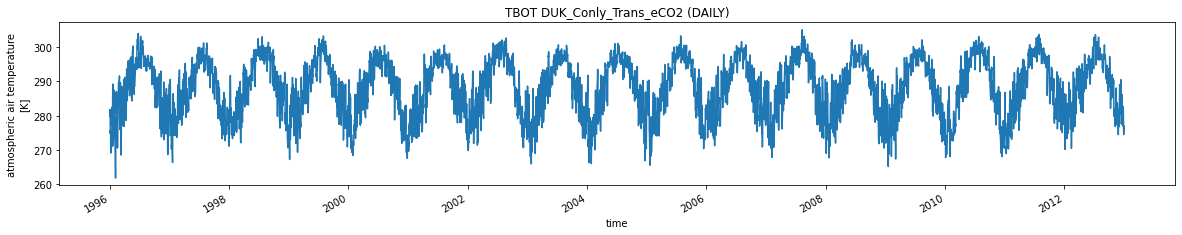

In [29]:
start = "1996-12-01"
end = "2000-01-01"
var = "TBOT"
for idx, key in enumerate(ds.keys()):
    ds[key][var].plot(figsize=(20,3))
    plt.title(f"{var} {key} (DAILY)")
    #plt.axvspan(start,end,alpha = .2, color = 'red')

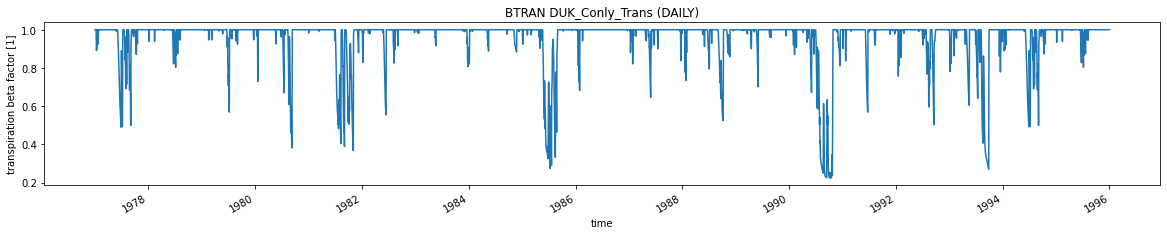

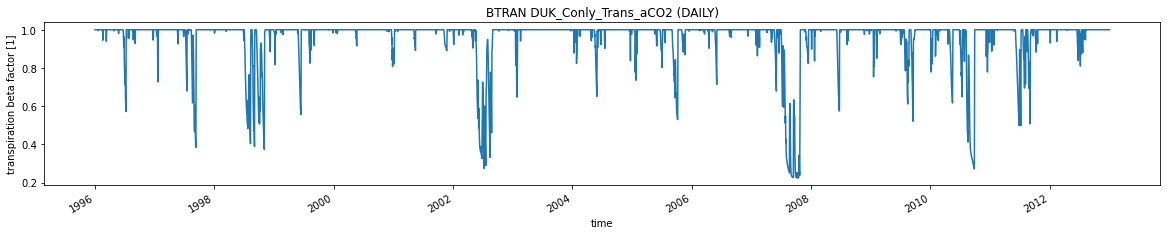

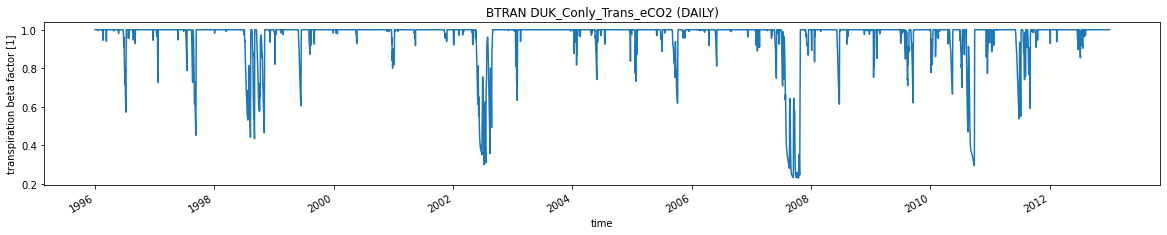

In [59]:
start = "1996-12-01"
end = "2000-01-01"
var = "BTRAN"
for idx, key in enumerate(ds.keys()):
    ds[key][var].plot(figsize=(20,3))
    plt.title(f"{var} {key} (DAILY)")
    #plt.axvspan(start,end,alpha = .2, color = 'red')

# Report
The simulations seems to be running fine. We do not have have CO2 concentrations beyond 2007 for the DUK forest. Do we need to fix those input files as well? <br>
How come we have simulations beyond 2007 if there is not CO2 concentration data?

# Changes to the input data
`/Users/ud4/models/OLMT/data/lnd/clm2/PTCLM/FACE-MDS_sitedata.txt`: end year was changed from 2007 to 2012 <br>
`/Users/ud4/models/OLMT/data/atm/datm7/CLM1PT_data/1x1pt_US-DUK`: new monthly met files were used